<a href="https://colab.research.google.com/github/Aji-Use/Machine-Learning/blob/main/UAS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import dataset
import pandas as pd
dt = pd.read_csv('Data Penjualan Bawang Merah.csv')

In [2]:
#menampilkan data teratas
dt.head(5)

,bulan,ukuran,musim,panen,permintaan pasar,harga (kg)
0,januari,kecil,hujan,tidak,"168,578",18000
1,januari,sedang,hujan,tidak,"168,578",20000
2,januari,besar,hujan,tidak,"168,578",25000
3,februari,kecil,hujan,tidak,"170,224",24000
4,februari,sedang,hujan,tidak,"170,224",27000


In [3]:
#info tipe data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bulan             33 non-null     object
 1   ukuran            33 non-null     object
 2   musim             33 non-null     object
 3   panen             33 non-null     object
 4   permintaan pasar  33 non-null     object
 5   harga (kg)        33 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 1.7+ KB


In [4]:
#cek data kosong
dt.isnull().sum()

bulan               0
ukuran              0
musim               0
panen               0
permintaan pasar    0
harga (kg)          0
dtype: int64

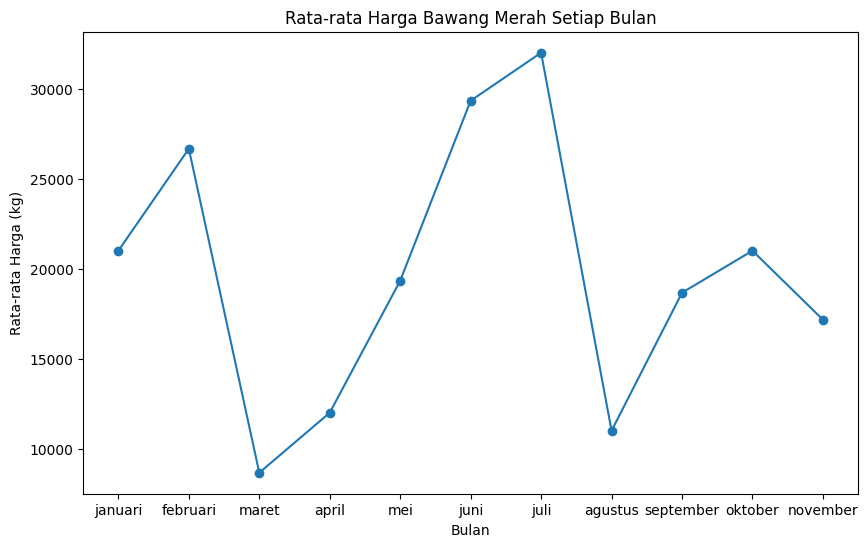

In [5]:
import matplotlib.pyplot as plt

#mengurutkan dari bulan januari-november
bulan_order = ['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november']
dt['bulan'] = pd.Categorical(dt['bulan'], categories=bulan_order, ordered=True)
dt = dt.sort_values('bulan')

#membuat rata-rata harga
dt_avg = dt.groupby('bulan')['harga (kg)'].mean().reset_index()

#visualisasi data
plt.figure(figsize=(10, 6))
plt.plot(dt_avg['bulan'], dt_avg['harga (kg)'], marker='o')
plt.title('Rata-rata Harga Bawang Merah Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Harga (kg)')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [7]:
#preprocessing data
dt['harga'] = pd.to_numeric(dt['harga (kg)'], errors='coerce')
dt = dt.dropna(subset=['harga'])

In [8]:
#transformasi data
categorical_features = ['bulan', 'ukuran', 'musim', 'panen']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

In [9]:
#memisahkan data menjadi x dan y (x untuk input user dan y untuk prediksi harga)
X = dt.drop(['harga', 'harga (kg)', 'permintaan pasar'], axis=1)
y = dt['harga']

In [22]:
#algoritma knn
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

#menggunakan GridSearchCV untuk mencari parameter terbaik
param_grid = {
    'regressor__n_neighbors': [3, 5, 7],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Parameter terbaik:", best_params)

best_knn_model = grid_search.best_estimator_

def predict_price(bulan, ukuran, musim, panen):
    input_data = pd.DataFrame({
        'bulan': [bulan],
        'ukuran': [ukuran],
        'musim': [musim],
        'panen': [panen]
    })

    input_data = input_data[X.columns]
    predicted_price = best_knn_model.predict(input_data)
    return predicted_price[0]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklea

Parameter terbaik: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 3, 'regressor__weights': 'uniform'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklea

In [20]:
#aksi
user_bulan = input("Masukkan bulan (januari, februari, ..., november): ")
user_ukuran = input("Masukkan ukuran (kecil, sedang, besar): ")
user_musim = input("Masukkan musim (hujan/kemarau): ")
user_panen = input("Masukkan panen (ya/tidak): ")

predicted_price = predict_price(user_bulan, user_ukuran, user_musim, user_panen)

print(f"Prediksi harga untuk bulan {user_bulan}, ukuran {user_ukuran}, musim {user_musim}, panen {user_panen} didapatkan: Rp {predicted_price}")


Masukkan bulan (januari, februari, ..., november): januari
Masukkan ukuran (kecil, sedang, besar): kecil
Masukkan musim (hujan/kemarau): hujan
Masukkan panen (ya/tidak): ya
Prediksi harga untuk bulan januari, ukuran kecil, musim hujan, panen ya didapatkan: Rp 16000.0
